[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mobadara/cardiovascular-disease-risk-prediction/blob/main/notebooks/exploratory-data-analysis.ipynb)
[![Kaggle Notebook](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/new?source=https://github.com/mobadara/cardiovascular-disease-risk-prediction/blob/main/notebooks/exploratory-data-analysis.ipynb)
[![Python](https://img.shields.io/badge/python-3.7+-blue.svg)](https://www.python.org/downloads/)
[![Jupyter](https://img.shields.io/badge/Jupyter-%23F37626.svg?style=for-the-badge&logo=jupyter&logoColor=white)](https://jupyter.org/)

# **Exploratory Data Analysis (EDA) - Cardiovascular Disease Risk Prediction**

## **Introduction**
This notebook performs an in-depth exploratory data analysis on the Cardiovascular Disease Dataset to understand its structure, distributions, relationships between variables, and identify potential issues for machine learning model development.

## **Data Aquisition and Environment Setup**
This code block first imports the necessary libraries. It then attempts to install `kagglehub` if it's not found. After that, it uses `kagglehub.dataset_download` to get the dataset. Finally, it loads the `cardio_train.csv` file into a pandas DataFrame and displays the first few rows and information about the DataFrame, which are standard first steps in EDA.

In [2]:
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import warnings

plt.style.use('ggplot')
warnings.filterwarnings('ignore')

In [3]:
# Download latest version
os.makedirs('../data', exist_ok=True)
path = kagglehub.dataset_download('sulianova/cardiovascular-disease-dataset')
# Copy the dataset into `../data` folder to match
# the project structure on GitHub, and rename the file to match
# my personal naming style.
full_path = [path + '/' + file for file in os.listdir(path)]
for file in full_path:
    if file.endswith('cardio_train.csv'):
        shutil.copyfile(file, '../data/cardio-train.csv')
try:
    os.remove('../data/cardio_train.csv')
except:
    pass

100%|██████████| 742k/742k [00:00<00:00, 73.5MB/s]

Extracting files...


## **Data Loading**
The subsequent code cell loads the acquired dataset into a pandas DataFrame (`df`). Displaying a few initial samples allows for a quick inspection of the data's structure and content.

In [4]:
df = pd.read_csv('../data/cardio-train.csv', sep=';')
df.sample(10)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
21551,30787,16710,2,171,92.0,110,80,2,2,0,0,1,1
50724,72386,19105,1,160,58.0,110,70,1,1,0,0,1,0
34322,49036,20577,2,173,83.0,120,69,1,2,0,0,1,0
558,803,16758,1,166,62.0,110,70,1,1,0,0,1,0
35210,50304,15984,2,165,62.0,150,80,1,1,0,0,1,0
69518,99287,19629,1,150,70.0,140,90,1,1,0,0,1,1
61965,88482,18140,1,163,60.0,120,80,1,1,0,0,0,0
26094,37262,16654,1,159,56.0,120,80,1,1,0,0,1,0
24571,35078,23502,1,168,75.0,140,90,1,1,0,0,1,1
55269,78842,21917,1,169,69.0,140,60,1,1,0,0,1,1


A random sample of 10 rows from the DataFrame is displayed below. This provides a glimpse into the variety of patient data, including features such as `id`, `age` (in days), `gender`, `height`, `weight`, blood pressure (`ap_hi`, `ap_lo`), cholesterol and glucose levels (`cholesterol`, `gluc`), lifestyle factors (`smoke`, `alco`, `active`), and the target variable `cardio` (indicating the presence or absence of cardiovascular disease). Observing these samples helps to understand the scale and potential distribution of the different features.

## **Data Inspection**

The subsequent code cell provides a concise overview of the dataset, including the number of rows and columns, the data type of each column, and the count of any missing values. This initial inspection is crucial for understanding the dataset's structure and identifying potential data quality issues that may need to be addressed during preprocessing.

In [5]:
print(df.shape)

(70000, 13)


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB
None


In [7]:
df.isna().sum()

,0
id,0
age,0
gender,0
height,0
weight,0
ap_hi,0
ap_lo,0
cholesterol,0
gluc,0
smoke,0


The dataset consists of **70,000 rows** and **13 columns**, as confirmed by the shape of the DataFrame. The output of `df.info()` reveals that there are **no missing values** in any of the columns, as the "Non-Null Count" is 70,000 for each. The data types consist primarily of integers (`int64`), with one column (`weight`) being a float (`float64`). This information indicates a relatively clean dataset in terms of missingness and provides the foundational data types for each feature.

Since there are no missing values, it is not neccessary to inspect the distribution of missing values using heatmap.

## **Summary Statistics**

In [8]:
df.describe(include='all')

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,49972.419900,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,28851.302323,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,0.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25006.750000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50001.500000,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,74889.250000,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


The `df.describe()` method provides descriptive statistics for the numerical columns in the dataset. This includes the count, mean, standard deviation, minimum, 25th percentile, 50th percentile (median), 75th percentile, and maximum values for each numerical feature.

Observations from the descriptive statistics:

* **Age:** The average age is approximately **19469** days (around **53 years**), with a range from about **29** to **65** years.
* **Height:** The average height is around **164 cm**, with some seemingly unrealistic minimum and maximum values that might require further investigation.
* **Weight:** The average weight is about **74 kg**, with a wide range. Similar to height, the minimum and maximum weights might contain outliers.
* **Blood Pressure (`ap_hi`, `ap_lo`):** The average systolic blood pressure (`ap_hi`) is around 129, and the average diastolic blood pressure (`ap_lo`) is around **97**. The standard deviations are quite high, and the presence of negative minimum values and extremely high maximum values suggests potential data entry errors or outliers.
* **Cholesterol and Glucose (`cholesterol`, `gluc`):** These are categorical features encoded as numerical values **(1, 2, 3)**. The statistics show the distribution of these levels.
* **Lifestyle Factors (`smoke`, `alco`, `active`):** These are binary indicators (0 or 1), and the means indicate the proportion of individuals in each category. For example, the mean of 'smoke' being **~0.088** suggests that about **8.8%** of the individuals smoke.
* **Cardio:** The target variable has a mean of approximately **0.5**, indicating a roughly balanced dataset in terms of the presence (1) or absence (0) of cardiovascular disease.


## **Categorical Columns**

In [9]:
for col in ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']:
    print(df[col].value_counts(normalize=True))
    print()

gender
1    0.650429
2    0.349571
Name: proportion, dtype: float64

cholesterol
1    0.748357
2    0.136414
3    0.115229
Name: proportion, dtype: float64

gluc
1    0.849700
3    0.076157
2    0.074143
Name: proportion, dtype: float64

smoke
0    0.911871
1    0.088129
Name: proportion, dtype: float64

alco
0    0.946229
1    0.053771
Name: proportion, dtype: float64

active
1    0.803729
0    0.196271
Name: proportion, dtype: float64

cardio
0    0.5003
1    0.4997
Name: proportion, dtype: float64



The value counts for the categorical columns encoded as integers are as follows:

* **Cholesterol:**
    Level 1 is the most frequent (70%+), followed by level 2 (13%), and then level 3 (11%). Accoding to the dataset's metadata, most of the individuals represented in the dataset have a normal level of cholesterol.

* **Glucose:**
    Similar to cholesterol, level 1 (Normal) is the most frequent which accounts to about 84.9% of the total patients.

* **Smoke:**
    The majority of individuals in the dataset do not smoke (0). About 8.8% of the patients smoke.

* **Alcohol Consumption:**
    Most individuals in the dataset do not consume alcohol (0). About 94.6% of the individuals do not consume alcohol.

* **Physical Activity:**
    A larger proportion of individuals report being physically active (1). More than 80% of the patients in the dataset are physically active.

* **Cardio (Target Variable):**
    The target variable, indicating the presence (1) or absence (0) of cardiovascular disease, is very well balanced.

These value counts provide insights into the distribution of these categorical features within the dataset. For `cholesterol` and `gluc`, level 1 (Normal level) is notably more prevalent. For the lifestyle factors, the dataset shows a higher proportion of non-smokers, non-drinkers, and physically active individuals. The target variable `cardio` is almost perfectly balanced, which is beneficial for training a classification model.

## **Univariate Analysis**

### **Numerical Feature Distributions and Outliers**


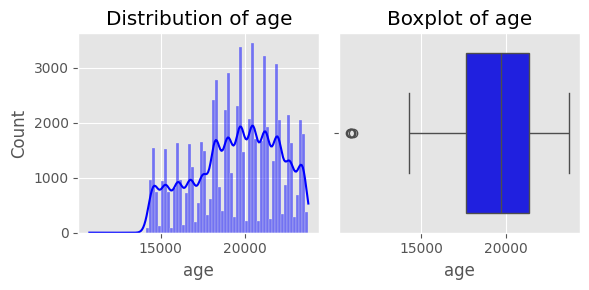

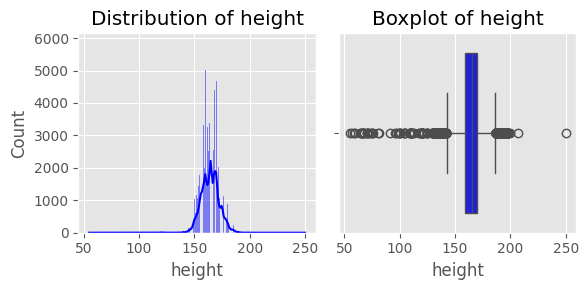

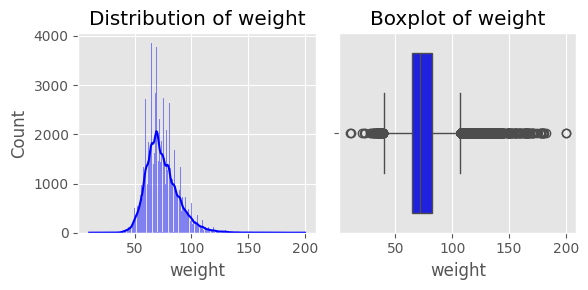

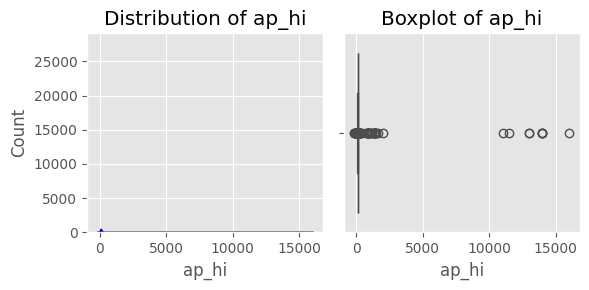

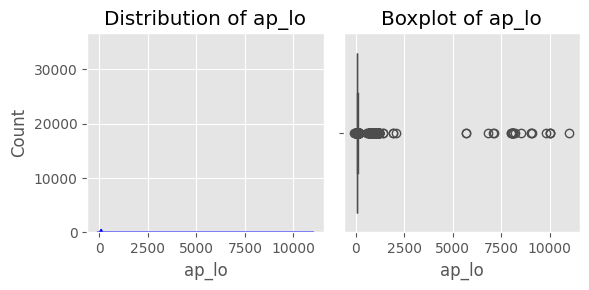

In [10]:
for col in ['age', 'height', 'weight', 'ap_hi', 'ap_lo']:
    fig = plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Distribution of {col}')

    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col], color='blue')
    plt.title(f'Boxplot of {col}')

    plt.tight_layout()
    plt.show()

* **Age:** The histogram for age shows an approximately normal distribution, with the majority of values concentrated between 15,000 and 25,000 days. No significant outliers were detected in the box plot. The alternating low and high values in the histogram might be an artifact of the data recording or binning.

* **Height:** The distribution of height is primarily between 150 cm and 200 cm. The box plot indicates the presence of outliers at both the lower and upper ends of the distribution.

* **Weight:** The weight distribution is mainly between 50 kg and 100 kg. Similar to height, the box plot reveals outliers on both the lower and upper sides.

* **Systolic and Diastolic Blood Pressure (`ap_hi`, `ap_lo`):** Both blood pressure readings exhibit very low values in the distributions, which are likely errors. Additionally, the box plots show the presence of significant outliers in both the high and low ranges for both `ap_hi` and `ap_lo`.

These initial visualizations highlight the need for potential data cleaning, particularly for the 'height', 'weight', 'ap_hi', and 'ap_lo' columns, to handle the identified outliers and unusual values. The distribution of 'age' appears more consistent, although the alternating pattern in the histogram might warrant further consideration.

##  **Bivariate Analysis**
### **Categorical Features vs. Target Variable (`cardio`)**

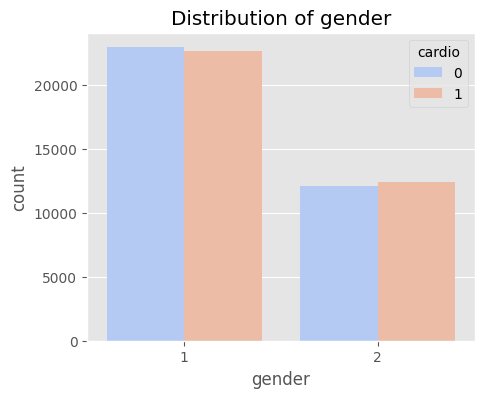

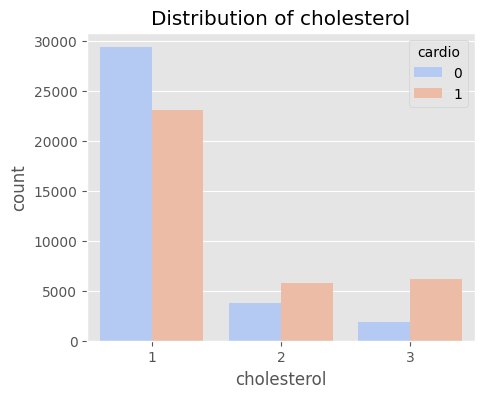

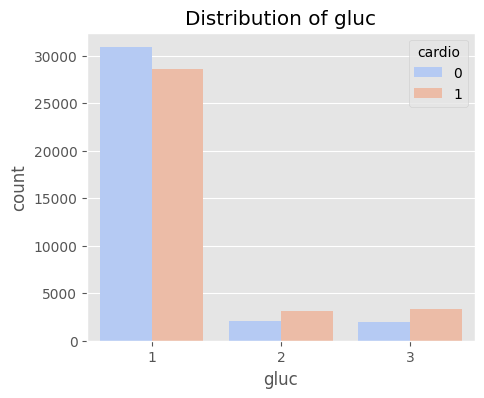

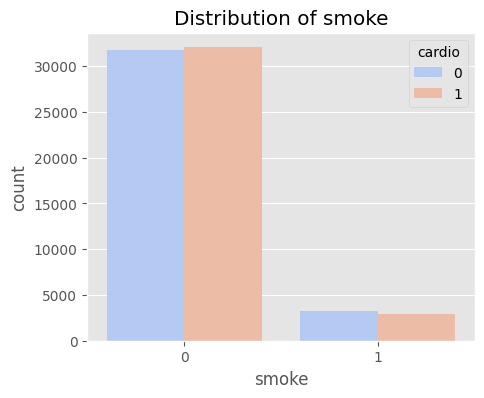

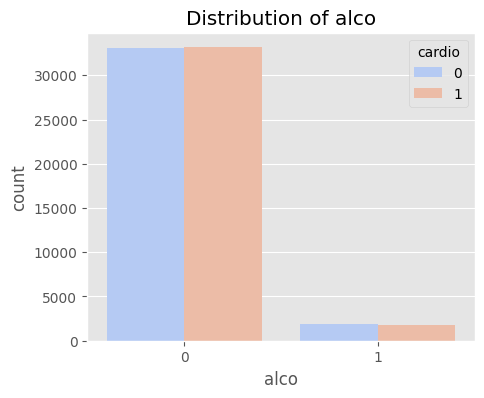

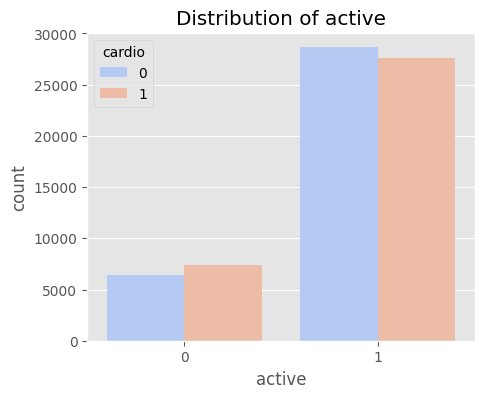

In [25]:
for col in ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']:
    fig = plt.figure(figsize=(5, 4))
    sns.countplot(data=df, x=df[col], hue='cardio', palette='coolwarm')
    plt.title(f'Distribution of {col}')
    plt.show()

Analysis comparing the categorical features (`gender`, `cholesterol`, `gluc`, `smoke`, `alco`, `active`) with the target variable `cardio`) revealed the following initial insights:

* **Gender:** The number of individuals with cardiovascular disease ('cardio' = 1) appears to be higher in the male category.

* **Cholesterol:** A higher proportion of individuals with cholesterol levels at Level 2 and Level 3 show the presence of cardiovascular disease compared to those at Level 1.

* **Glucose:** Similarly, a higher proportion of individuals with glucose levels at Level 2 and Level 3 show the presence of cardiovascular disease compared to those at Level 1.

* **Smoking and Alcohol Consumption:** The proportion of individuals with cardiovascular disease is approximately the same for smokers and non-smokers, as well as for those who consume alcohol and those who do not.

* **Physical Activity:** Individuals who engage in active exercise are less likely to have cardiovascular disease compared to those who are not active.

These initial bivariate analyses provide some interesting relationships between the categorical features and the likelihood of having cardiovascular disease.

What's the next step you'd like to take in your EDA?

### **Numerical Features vs. Target Variable ('cardio')**

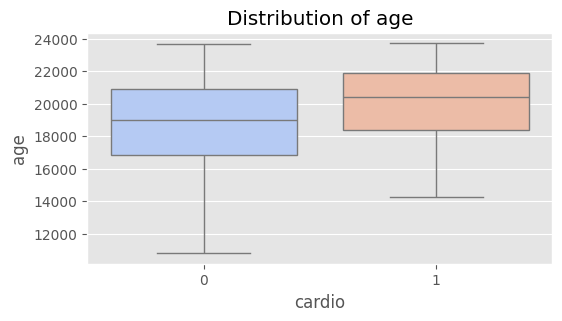

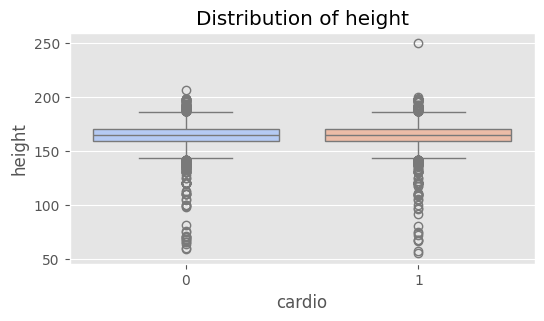

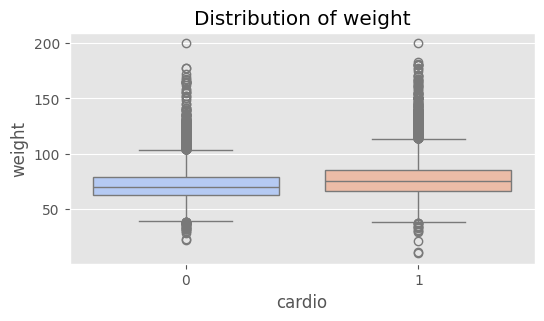

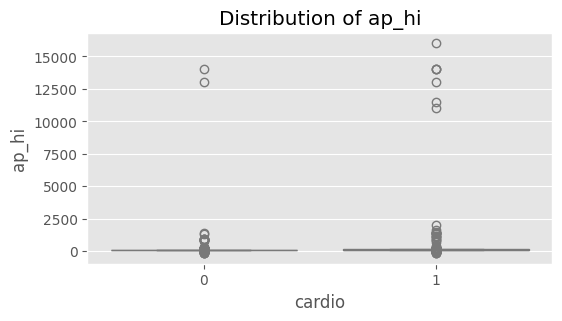

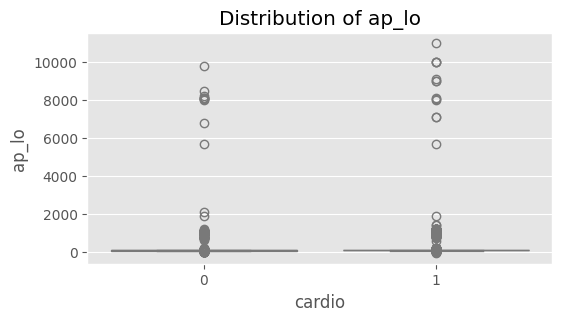

In [23]:
for col in ['age', 'height', 'weight', 'ap_hi', 'ap_lo']:
    fig = plt.figure(figsize=(6, 3))
    sns.boxplot(x='cardio', y=df[col], data=df, palette='coolwarm')
    plt.title(f'Distribution of {col}')
    plt.show()

Analysis comparing the numerical features (`age`, `height`, `weight`, `ap_hi`, `ap_lo`) with the target variable (`cardio`) yielded the following observations:

* **Age:** Individuals of older ages tend to have a higher risk of cardiovascular disease.

* **Height:** The mean height appears to be approximately the same for individuals with and without cardiovascular disease.

* **Weight:** People with higher weights are more likely to be at risk of cardiovascular disease.

* **Blood Pressure (`ap_hi`, `ap_lo`):** There does not appear to be a significant variation in the distributions of systolic (`ap_hi`) and diastolic (`ap_lo`) blood pressure between individuals with and without cardiovascular disease based on this initial bivariate analysis.

These comparisons provide further insights into how numerical features relate to the likelihood of cardiovascular disease.

## **Multivariate Analysis**

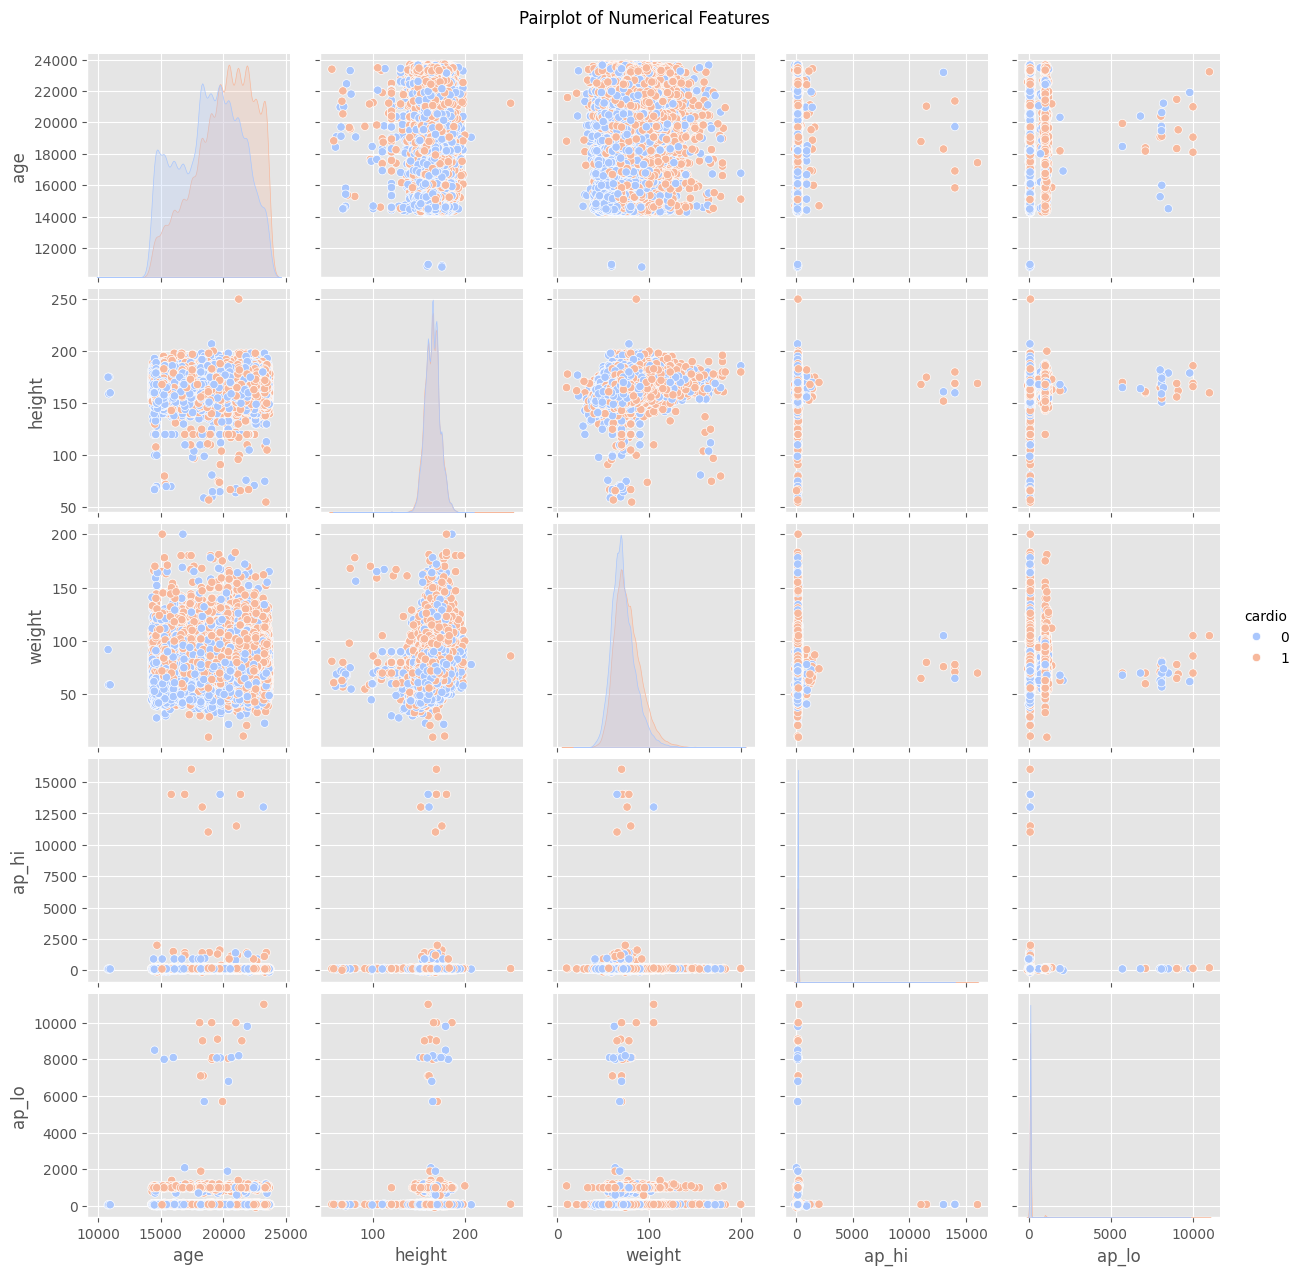

In [26]:
ax = sns.pairplot(data=df, vars=['age', 'height', 'weight', 'ap_hi', 'ap_lo'], hue='cardio', palette='coolwarm')
ax.fig.suptitle('Pairplot of Numerical Features', y=1.02)
plt.show()

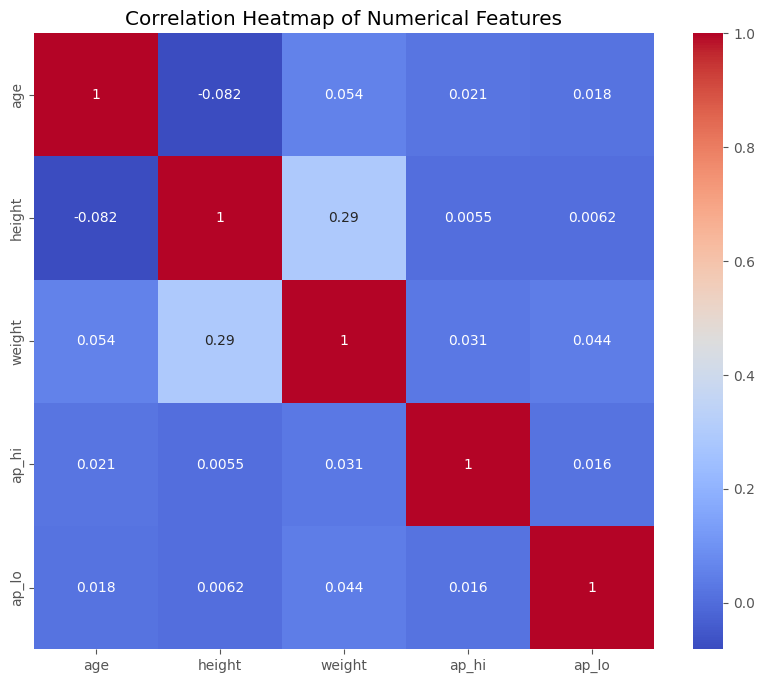

In [30]:
plt.figure(figsize=(10, 8))
corr_mat = df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']].corr()
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

A correlation heatmap was generated to visualize the linear relationships between the numerical features. The analysis revealed that there are no strong correlations between most numerical variables. The only notable exception is a slight positive correlation observed between **`height` and `weight`**, which is expected as taller individuals may tend to weigh more.

No other pairs of numerical features exhibited a strong linear relationship based on the correlation heatmap.


## **Recommended Data Processing and Feature Engineering**

Based on the exploratory data analysis, here are recommended data processing techniques and feature engineering procedures:

**Data Processing:**

1.  **Outlier Handling:**
    * Explore techniques like trimming/clipping or transformation for outliers in `height`, `weight`, `ap_hi`, and `ap_lo`.
    * Investigate and handle unusual (e.g., negative, extremely high) values in `ap_hi` and `ap_lo`, potentially by removal.

2.  **Age Transformation:**
    * Convert the 'age' column from days to years for better interpretability.

**Feature Engineering:**

1.  **Body Mass Index (BMI):**
    * Create a new feature using: $\text{BMI} = \frac{\text{weight (kg)}}{(\text{height (m)})^2}$.

2.  **Blood Pressure Categories (Optional):**
    * Consider creating categorical features from `ap_hi` and `ap_lo` based on medical guidelines.

3.  **Interaction Features (Optional):**
    * Explore interaction terms between potentially relevant features later in the modeling process.

**Recommended Next Steps:**

1.  Handle unusual blood pressure values and outliers in height and weight.
2.  Create the BMI feature.
3.  Convert age to years.

___
Muyiwa J. Obadara<br>
[https://linkedin.com/in/obadara-m](https://linkedin.com/in/obadara-m)<br>
[https://github.com/mobadara](https://github.com/mobadara)